<a href="https://colab.research.google.com/github/ahmedelgamal0/loan-prediction/blob/main/Loan_Predection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading and Exploring the Data

This section explores the train and test datasets as shown below.

- **The train dataset** contains 614 observations and 13 features represents 12 independent variables and 1 target variable.
- **The test dataset** contains the same features except the target variable.
- The data type of each variable is also provided below whether its categorical or numerical.


In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder


%matplotlib inline

In [6]:
# Importing the datasets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train_original=train.copy() 
test_original=test.copy()

**The dataset consists of the following columns:**

- **Loan_ID :** Unique Loan ID<br>
- **Gender :** Male/ Female<br>
- **Married :** Applicant married (Y/N)<br>
- **Dependents :** Number of dependents <br>
- **Education :** Applicant Education (Graduate/ Under Graduate)<br>
- **Self_Employed :** Self employed (Y/N)<br>
- **ApplicantIncome :** Applicant income<br>
- **CoapplicantIncome :** Coapplicant income<br>
- **LoanAmount :** Loan amount in thousands of dollars<br>
- **Loan_Amount_Term :** Term of loan in months<br>
- **Credit_History :** credit history meets guidelines yes or no<br>
- **Property_Area :** Urban/ Semi Urban/ Rural<br>
- **Loan_Status :** Loan approved (Y/N) this is the target variable<br>

In [7]:
# Understanding the dataset
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
# Checking the columns and the shape of the train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
# Checking the columns and the shape of the test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


# Exploratory Data Analysis (EDA)

## Univariate Analysis

Univariate analysis is used in this section to analyze each variable individually.

**For numerical features** ,we can use Probability Density Functions(PDF) to look at the distribution of the numerical variables.

**For categorical features** ,frequency tables or bar plots can be used to calculate the number of each category in a particular variable. 



### Categorical Features

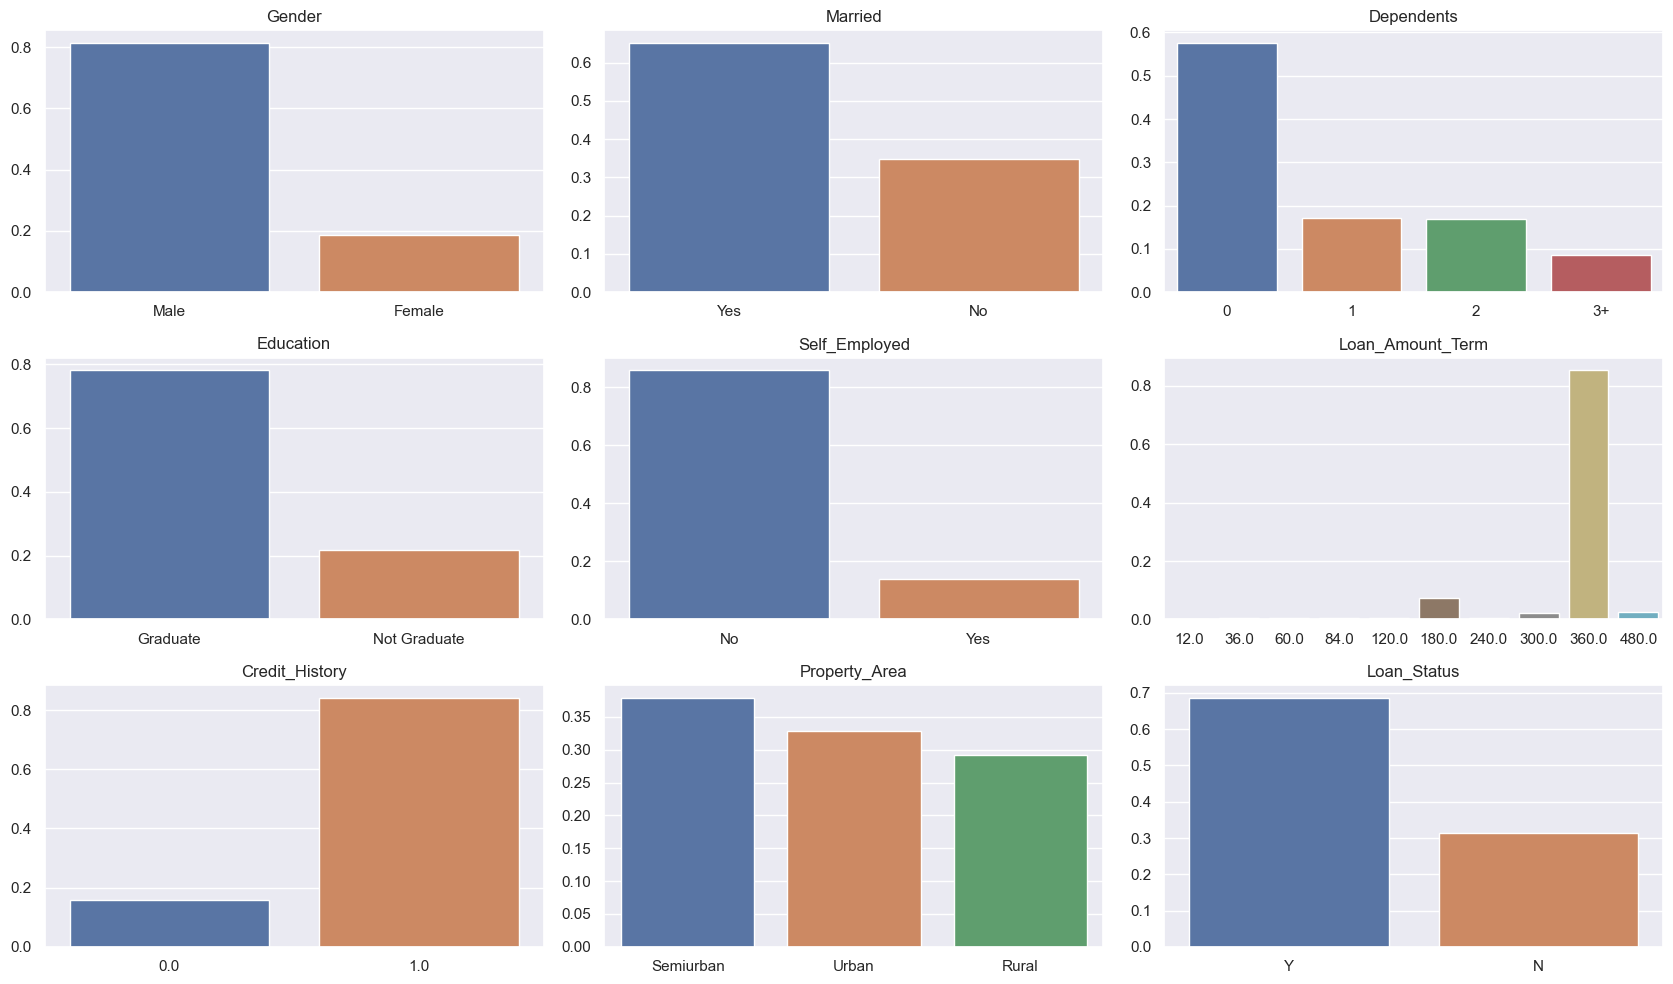

In [91]:
# Visualizing categorical data individually
plt.figure(figsize=(17, 10))
index = 1
for column in train.columns:
    if column not in ['Loan_ID','ApplicantIncome','CoapplicantIncome', 'LoanAmount']:
        graph = pd.value_counts(train[column].values, sort=True, normalize=True)

        plt.subplot(3, 3, index)
        plt.title(column)

        plt.tight_layout()
        sns.barplot(x=graph.index, y=graph)
        
        index += 1

In [34]:
sns.set_theme()

### Numerical Features

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

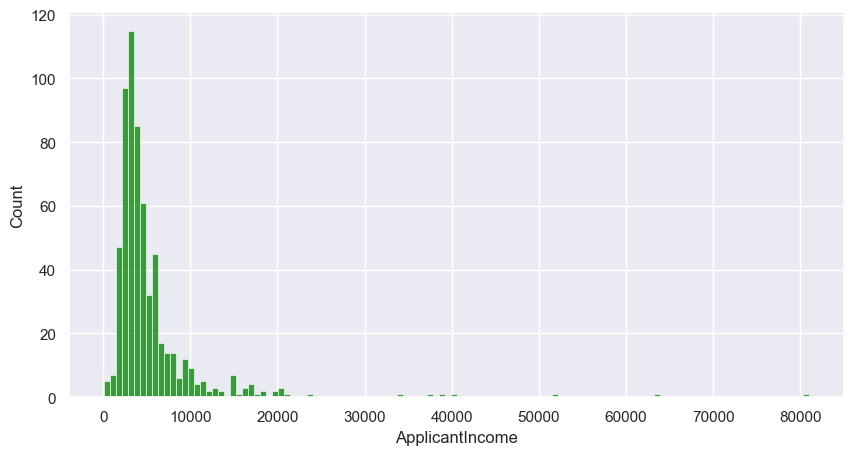

In [103]:
# plot the histogram of ApplicantIncome
plt.figure(figsize = (10, 5))
sns.histplot(train['ApplicantIncome'], color='green')


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

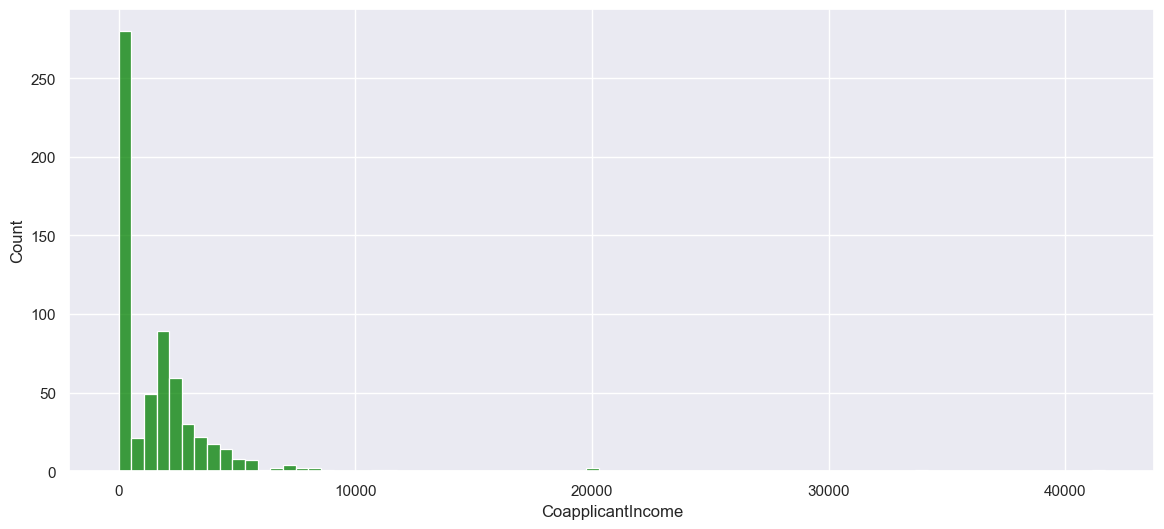

In [102]:
# plot the histogram of CoapplicantIncome
plt.figure(figsize = (14, 6))
sns.histplot(train['CoapplicantIncome'], color='green')

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

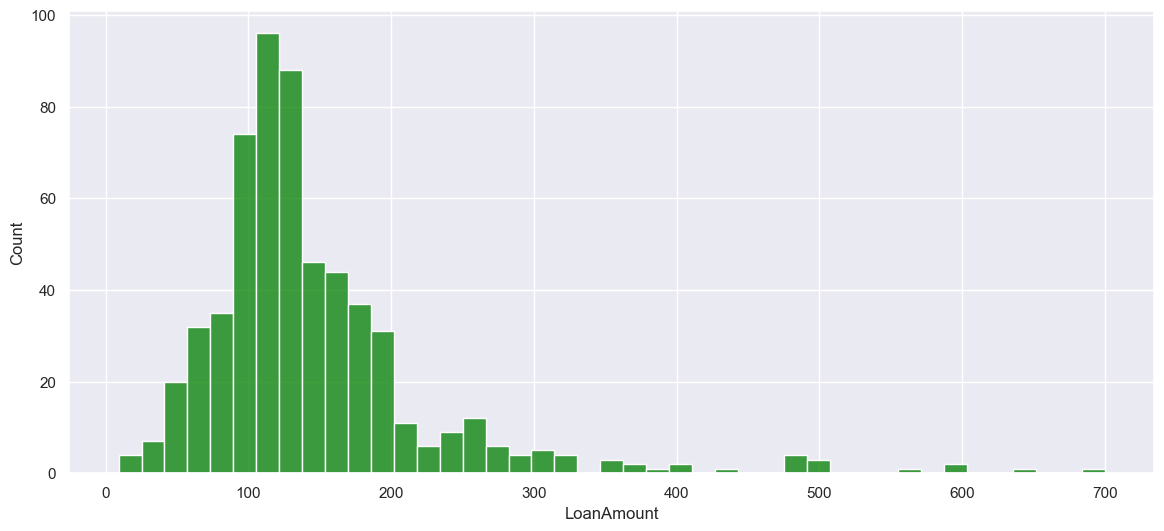

In [104]:
# plot the histogram of LoanAmount
plt.figure(figsize = (14, 6))
sns.histplot(train['LoanAmount'],color='green')

### Insights from the univariate analysis.

- 80% of applicants in the dataset are male.
- Around 65% of the applicants in the dataset are married.
- Most of the applicants don’t have dependents.
- About 80% of the applicants are graduates.
- About 15% of applicants in the dataset are self-employed.
- About 85% of the applicants chosed the loan on 360 months.
- About 85% of applicants have repaid their debts.
- Most of the applicants are from semi-urban areas.
- 422(around 69%) people out of 614 got the approval.
- The applicant income and coapplicant income has a similiar extremely left-skewed distribution.
- The loan amount is fairly normal but contains outliers.

## Bivariate Analysis

Bivariate Analysis is used in this section to know how well each feature correlates with Loan Status.

### Categorical Features vs Target Variable

In [71]:
def cross_tab(col):
    df = pd.crosstab(train[col], train['Loan_Status'])
    return df.div(df.sum(1).astype(float), axis=0)


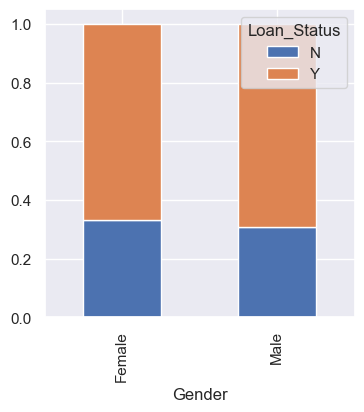

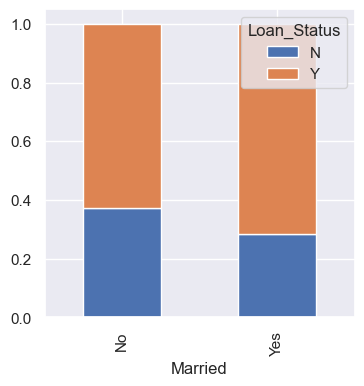

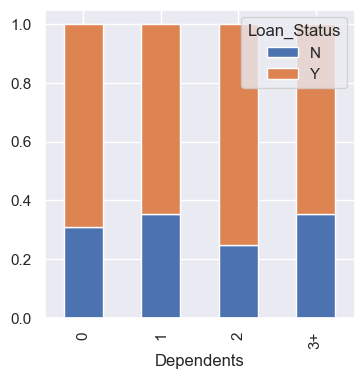

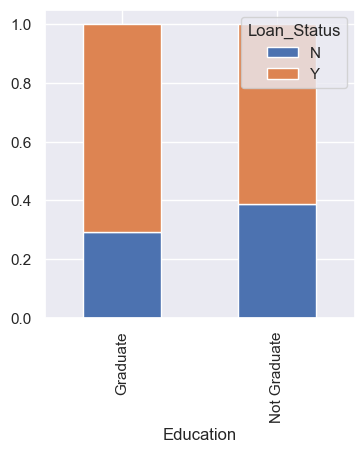

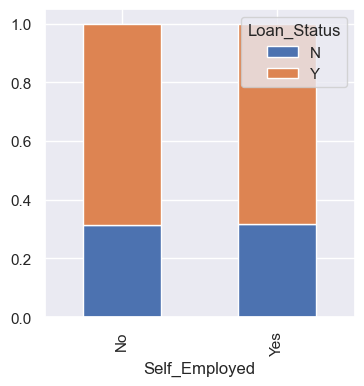

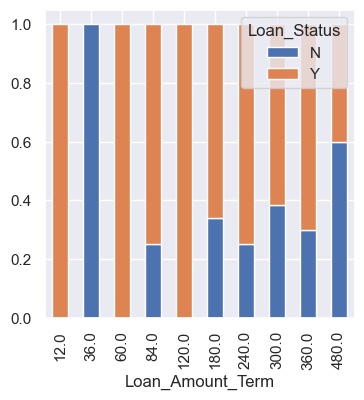

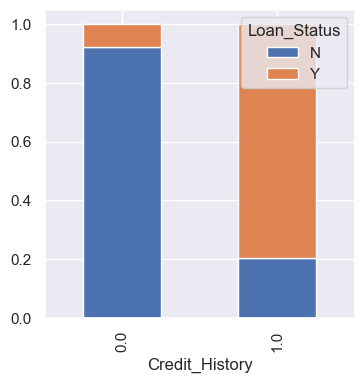

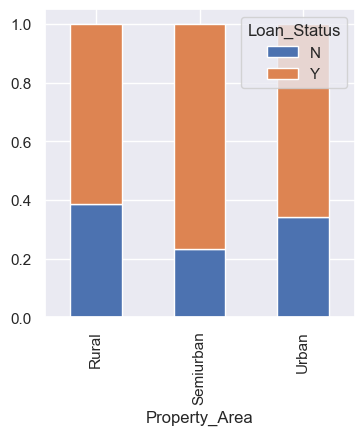

In [115]:
for column in train.columns:
    if column not in ['Loan_ID','ApplicantIncome','CoapplicantIncome', 'LoanAmount', 'Loan_Status']:
        cross_tab(column).plot(kind='bar', stacked=True, figsize=(4,4))


### Numerical Features vs Target Variable

In [127]:
train[["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

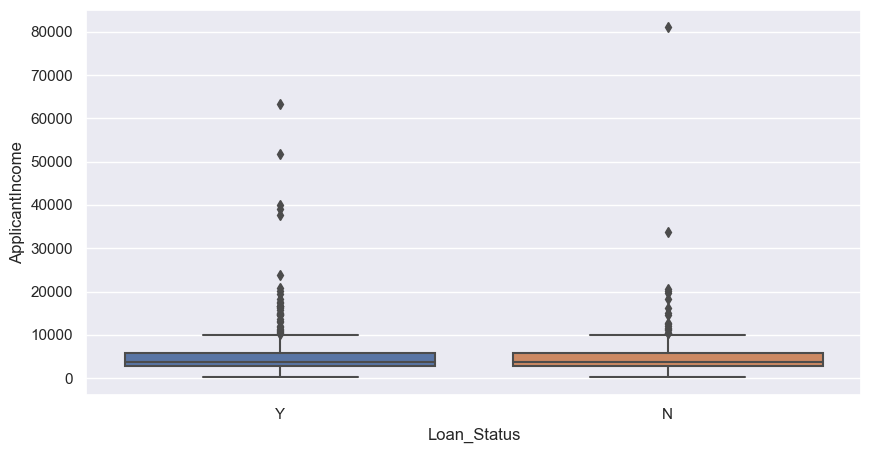

In [119]:
#pltot the ApplicantIncome vs Loan_Status
plt.figure(figsize=(10,5))
sns.boxplot(x=train.Loan_Status, y=train.ApplicantIncome, data=train)

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

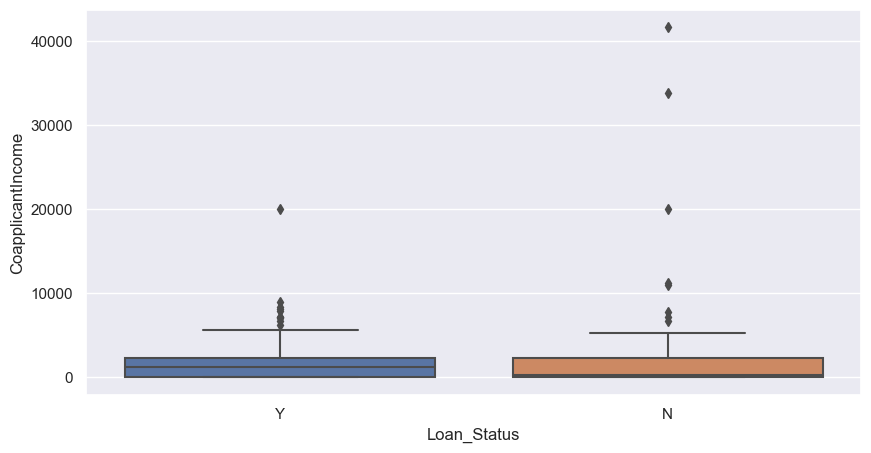

In [121]:
# plot the CoapplicantIncome vs Loan_Status
plt.figure(figsize=(10,5))
sns.boxplot(x=train.Loan_Status, y=train.CoapplicantIncome, data=train)

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

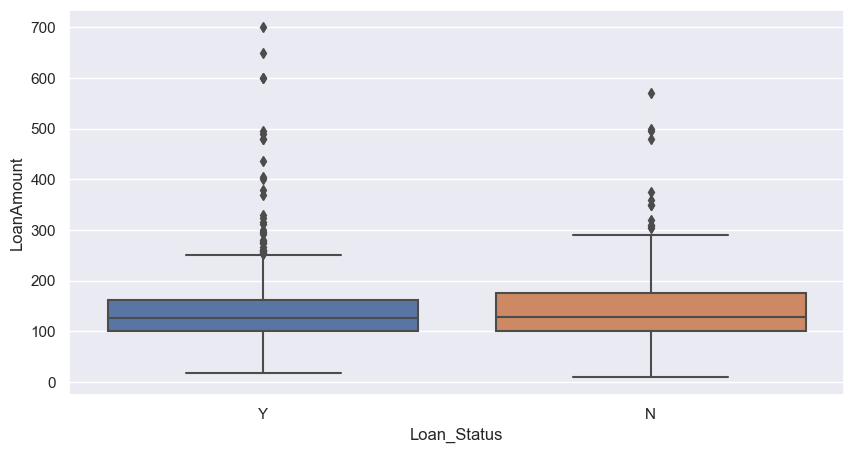

In [124]:
# plot the LoanAmount vs Loan_Status
plt.figure(figsize=(10,5))
sns.boxplot(x=train.Loan_Status, y=train.LoanAmount, data=train)

### Insights from the bivariate analysis

- 
- 

# Data Preprocessing

## Encoding categrical Features


## Missing Value Treatment

The `check_missing(df)` function below takes a dataframe as an input and outputs the count of null values for each variable.

In [12]:
def check_missing(df):
    return df.isnull().sum()

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, and Credit_History features.

In [13]:
check_missing(train)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# Treating categorical missing values


In [ ]:
# Treating numerical missing values


In [ ]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

# Developing the Model

## Splitting the dataset